# 'Loan Prediciton'

In [2]:
#Problem statement
#This is a classification Problem, here we predict whether the customer applied for a loan will ge granted loan or not based on'
#the given set of independent variable'

In [3]:
#importing the libraries

In [4]:
import numpy as np               #For mathematical calculations
import pandas as pd              #For dataFrame
import seaborn as sns            #For data visualiztion
import matplotlib.pyplot as plt  #For plotting graphs
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")#To ignore warnings

In [5]:
#Reading data
train = pd.read_csv(r'C:\Users\Biju\Desktop\DSE\Data set\Loan\Loan_train.csv')

In [270]:
l1 = train.copy()

In [68]:
l1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [7]:
#we will check the features present in our train data
l1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
#now we will look the datatypes of each feature
l1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [10]:
#lets look at the shape of our dataset
l1.shape

((614, 13), (367, 12))

In [11]:
l1['Loan_Status'].value_counts(),l1['Married'].value_counts(),l1['Dependents'].value_counts(),l1['Credit_History'].value_counts()

(Y    422
 N    192
 Name: Loan_Status, dtype: int64, Yes    398
 No     213
 Name: Married, dtype: int64, 0     345
 1     102
 2     101
 3+     51
 Name: Dependents, dtype: int64, 1.0    475
 0.0     89
 Name: Credit_History, dtype: int64)

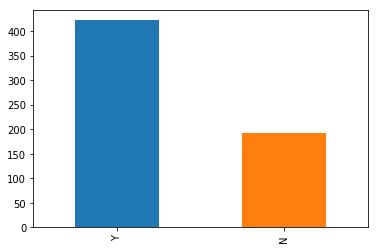

In [12]:
l1['Loan_Status'].value_counts().plot.bar()

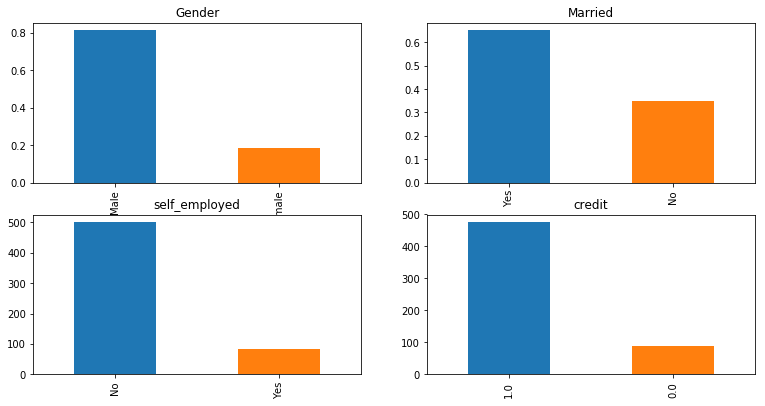

In [36]:
#independent variable(catogerical)
plt.figure(2)
plt.subplot(334)
l1['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(335)
l1['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')
plt.subplot(337)
l1['Self_Employed'].value_counts().plot.bar(figsize=(20,10),title='self_employed')
plt.subplot(338)
l1['Credit_History'].value_counts().plot.bar(figsize=(20,10),title='credit')
plt.show()


In [15]:
l1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


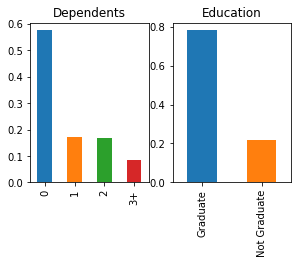

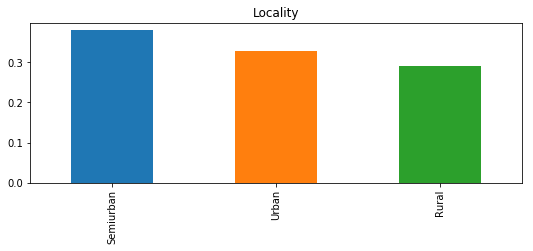

In [41]:
#independent variable(ordinal)
plt.figure(1)
plt.subplot(388)
l1['Education'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Education')
plt.subplot(387)
l1['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Dependents')
plt.figure(3)
plt.subplot(336)
l1['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(30,10),title='Locality')

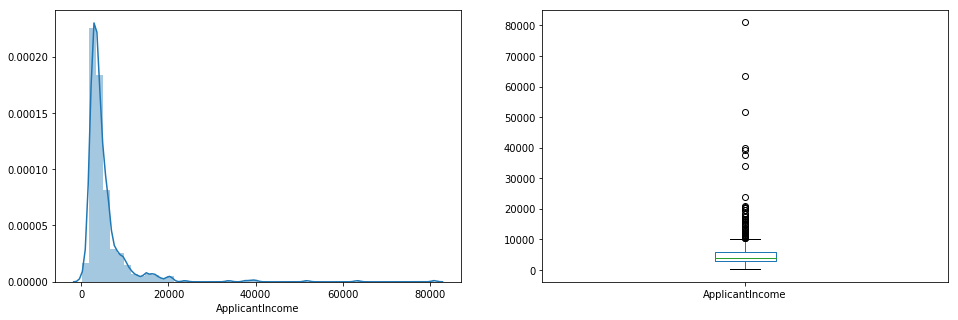

In [52]:
plt.figure(1)
plt.subplot(121) 
sns.distplot(l1['ApplicantIncome'])
plt.subplot(122)
l1['ApplicantIncome'].plot.box(figsize=(16,5))

Text(0.5,0.98,'')

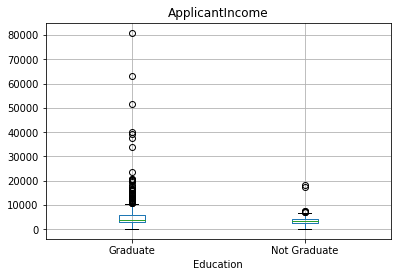

In [54]:
l1.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

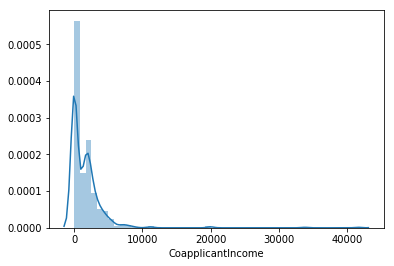

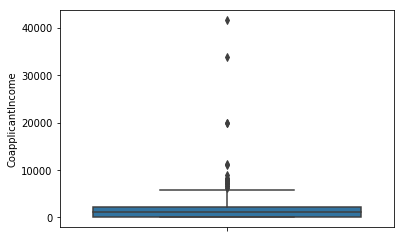

In [59]:
sns.distplot(a=l1['CoapplicantIncome'])
plt.show()
sns.boxplot(y=l1['CoapplicantIncome'])
plt.show()

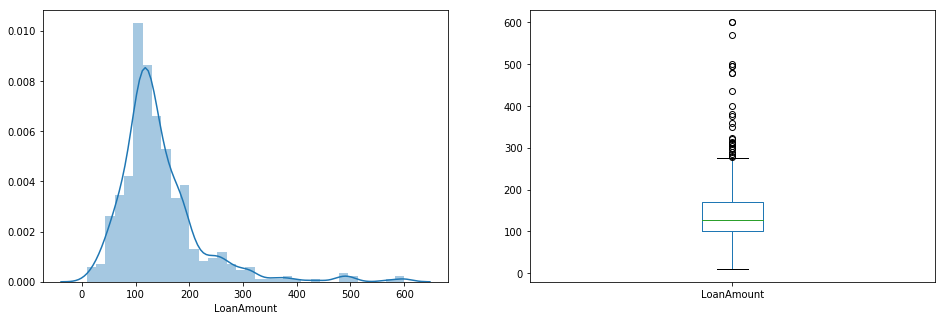

In [63]:
plt.figure(1)
plt.subplot(121)
l1=l1.dropna()
sns.distplot(l1['LoanAmount'])
plt.subplot(122)
l1['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

In [70]:
#bivariate analysis

Loan_Status,N,Y
Gender,,
Female,32,54
Male,116,278


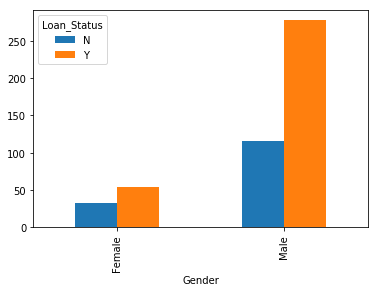

In [75]:
g=pd.crosstab(l1['Gender'],l1['Loan_Status'])
g.plot.bar()
g

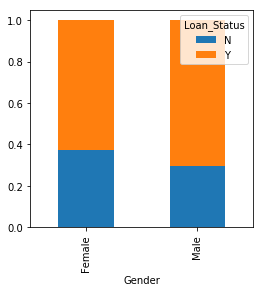

In [77]:
g.div(g.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.show()

Loan_Status   N    Y
Dependents          
0            87  187
1            28   52
2            20   65
3+           13   28 Loan_Status   N    Y
Married             
No           64  105
Yes          84  227


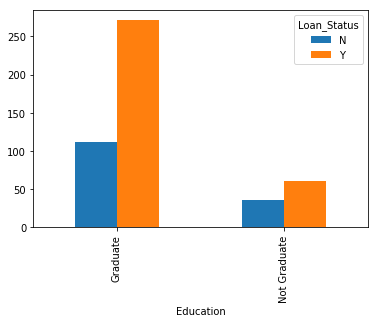

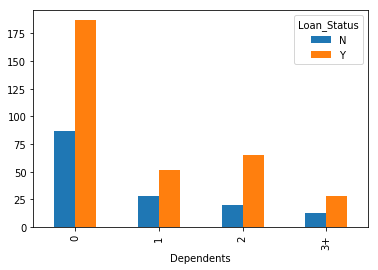

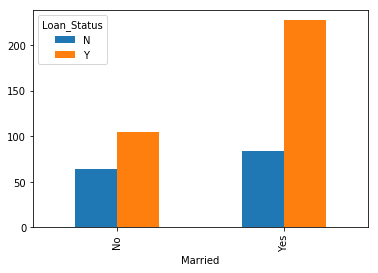

In [81]:
m=pd.crosstab(l1['Married'],l1['Loan_Status'])
d=pd.crosstab(l1['Dependents'],l1['Loan_Status'])
e=pd.crosstab(l1['Education'],l1['Loan_Status'])
e.plot.bar()

d.plot.bar()
m.plot.bar()
print(d,m)

Loan_Status,N,Y
Credit_History,,
0.0,63,7
1.0,85,325


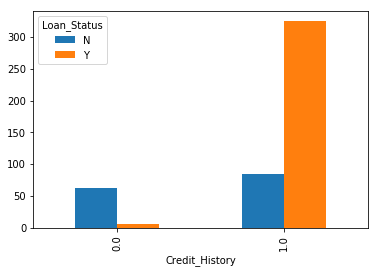

In [84]:
c=pd.crosstab(l1['Credit_History'],l1['Loan_Status']);c.plot.bar();c

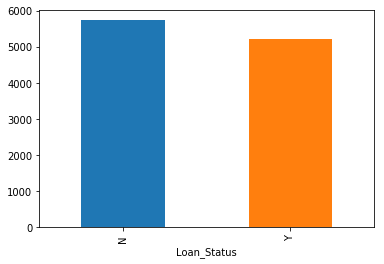

In [86]:
#bivariate numberical independent variable vs target variable
l1.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()


In [105]:
#here we don't see any changes this doesn't seem right so let's make bins for ApplicantIncome variable
bins = [0,2500,4000,6000,81000] ;group=['Low','Average','High','Very_high']
l1['Income']=pd.cut(l1['ApplicantIncome'],bins,labels=group)

In [109]:
i=pd.crosstab(l1['Income'],l1['Loan_Status'])

Text(0,0.5,'Percentage')

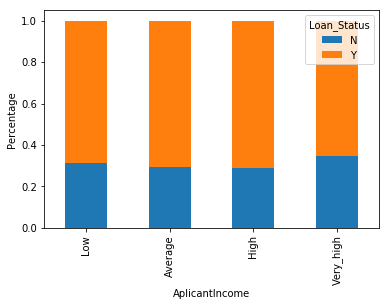

In [110]:


i.div(i.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('AplicantIncome')
plt.ylabel('Percentage')


Text(0,0.5,'Percentage')

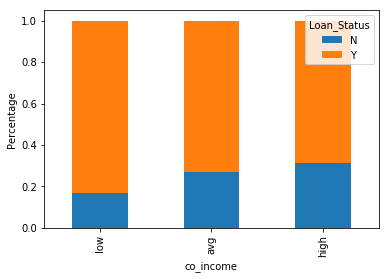

In [112]:
bins=[0,1000,3000,42000];groups=['low','avg','high']
l1['co_income']=pd.cut(l1['CoapplicantIncome'],bins,labels=groups)
ci=pd.crosstab(l1['co_income'],l1['Loan_Status'])
ci.div(ci.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.ylabel('Percentage')

In [117]:
#Insight from the above plot tells us that if the income is low the changes of loan approval is high. this doesn't look right
l1['Total_income']=l1['ApplicantIncome']+l1['CoapplicantIncome']

                                

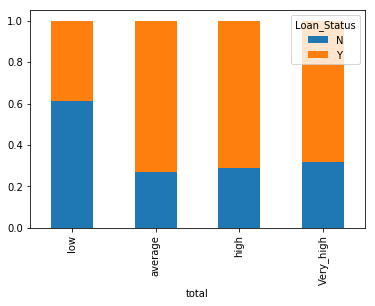

In [128]:
bins=[0,2500,4000,6000,81000];gr=['low','average','high','Very_high']
l1['total']=pd.cut(l1['Total_income'],bins,labels=gr)
t=pd.crosstab(l1['total'],l1['Loan_Status'])
t.div(t.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.show()

In [130]:
bins=[0,100,200,700]; gg=['low','mid','high']
l1['loan']=pd.cut(l1['LoanAmount'],bins,labels=gg)

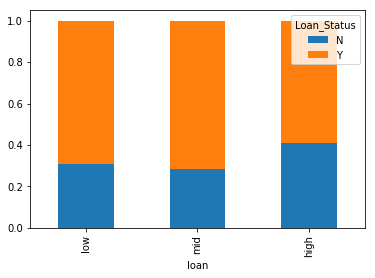

In [131]:
l=pd.crosstab(l1['loan'],l1['Loan_Status'])
l.div(l.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

In [136]:
#lets drop the columns created for exploration part
l1=l1.drop(['Income','co_income','Total_income','total','loan'],axis=1)

In [ ]:
#lets convert target variable from Y and N to numberical value of 1 and 0, one of the reasons is logsitic regression takes only 
#numeric values as target

In [271]:
l1['Dependents'].replace('3+',3,inplace=True)

In [272]:
l1['Loan_Status'].replace('Y',1,inplace=True)
l1['Loan_Status'].replace('N',0,inplace=True)

In [140]:
#now lets find the correlation between the numberical variables
l1.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.043152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692,-0.049020
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.071753
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.007798
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000,0.529390
Loan_Status,-0.043152,-0.049020,-0.071753,-0.007798,0.529390,1.000000


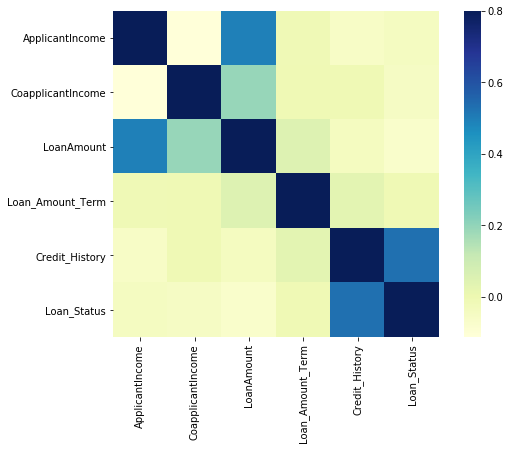

In [149]:
#heat mat
h=l1.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(h, vmax=.8, square=True,cmap='YlGnBu')

In [ ]:
#missing value imputation

In [152]:
l1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#for numberical : imputation with mean or median
#for catogerical: imputation with mode

In [273]:
l1['Gender'].fillna(l1['Gender'].mode()[0],inplace=True) #mode()[0]:is to select the index of mode if there are multiple modes
l1['Married'].fillna(l1['Married'].mode()[0],inplace=True)
l1['Dependents'].fillna(l1['Dependents'].mode()[0],inplace=True)
l1['Self_Employed'].fillna(l1['Self_Employed'].mode()[0],inplace=True)


In [274]:
l1['Loan_Amount_Term'].fillna(l1['Loan_Amount_Term'].mode()[0],inplace=True)
l1['Credit_History'].fillna(l1['Credit_History'].mode()[0],inplace=True)

In [275]:
l1['LoanAmount'].fillna(l1['LoanAmount'].median(),inplace=True)
l1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#outlier treatment

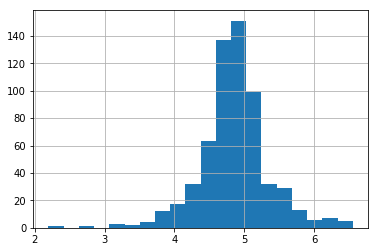

In [276]:
l1['Log']=np.log(l1['LoanAmount'])
l1['Log'].hist(bins=20)

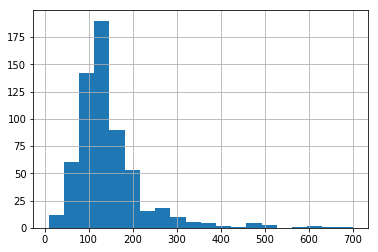

In [169]:
l1['LoanAmount'].hist(bins=20)

In [ ]:
#Model building

In [277]:
#Let's drop Loan_ID as it has no effect on target variable
l1=l1.drop('Loan_ID',axis=1)


In [173]:
#let's seperate the target variable from the other independent variables
x=l1.drop('Loan_Status',1)
y=l1['Loan_Status']

In [174]:
#now let's get dummy variables for catogerical varialbes. Dummy variables convert catogerical variables to a series of o's and 1's
#logistic regression takes only numberical variables as input

In [278]:
l1=pd.get_dummies(l1,columns=['Gender'])

In [176]:
#other way
x= pd.get_dummies(x)


In [183]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [182]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state = 1)

In [184]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [185]:
#lets predict the accuracy
y_pred = model.predict(x_test)

In [188]:
accuracy_score(y_test,y_pred)

0.7945945945945946

In [ ]:
#k_fold cross validation

In [194]:
from sklearn.model_selection import cross_val_score

In [196]:
scores = cross_val_score(model, x_train, y_train, cv=5)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.81609195 0.84883721 0.81395349 0.82352941 0.8       ]


In [ ]:
#feature engineering
#based on the domain knowledge we can come up with new variable that might effect the new variable

In [279]:
#total income
l1['Total_income']=l1['ApplicantIncome']+l1['CoapplicantIncome']

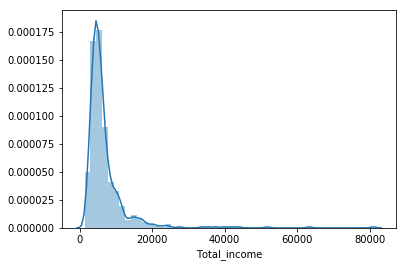

In [280]:
sns.distplot(l1['Total_income'])

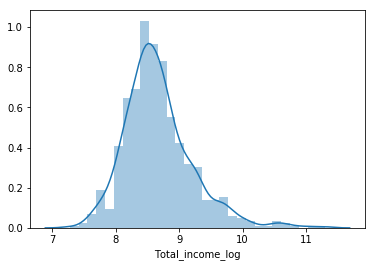

In [281]:
l1['Total_income_log']=np.log(l1['Total_income'])
sns.distplot(l1['Total_income_log'])

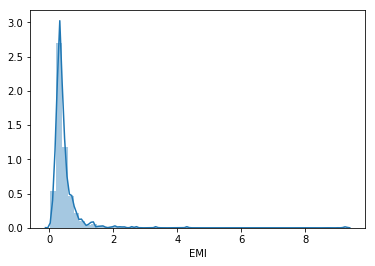

In [282]:
#Em1
l1['EMI']=l1['LoanAmount']/l1['Loan_Amount_Term']
sns.distplot(l1['EMI'])

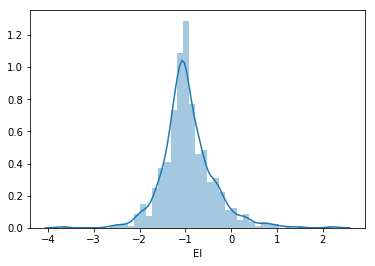

In [283]:
l1['El']=np.log(l1['EMI'])
sns.distplot(l1['El'])

In [284]:
#Balance
l1['Balance']=l1['Total_income']-(l1['EMI']*1000)# multipy with 1000 to make the units equal

In [285]:
#after creating new features we will continue our model building
X=l1.drop('Loan_Status',1)
Y=l1['Loan_Status']

In [286]:
#let's drop the columns
l1=l1.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [287]:
l1=l1.drop(['Total_income_log'],axis=1)

In [292]:
X=pd.get_dummies(X)

In [293]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [294]:
l1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Married           614 non-null object
Dependents        614 non-null object
Education         614 non-null object
Self_Employed     614 non-null object
Credit_History    614 non-null float64
Property_Area     614 non-null object
Loan_Status       614 non-null int64
Log               614 non-null float64
Gender_Female     614 non-null uint8
Gender_Male       614 non-null uint8
Total_income      614 non-null float64
EMI               614 non-null float64
El                614 non-null float64
Balance           614 non-null float64
dtypes: float64(6), int64(1), object(5), uint8(2)
memory usage: 58.8+ KB


In [295]:
LR=LogisticRegression(random_state=1)
LR.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [299]:
Y_pred=LR.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.7945945945945946

In [300]:
#cross fold validation
scores = cross_val_score(LR, X_train, Y_train, cv=5)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.81609195 0.84883721 0.80232558 0.82352941 0.77647059]


# Decision Tree

In [301]:
from sklearn.tree import DecisionTreeClassifier

In [302]:
DT = DecisionTreeClassifier()
DT.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [303]:
Y_pred=DT.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.7027027027027027

In [304]:
#cross fold validation
scores = cross_val_score(DT, X_train, Y_train, cv=5)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.67816092 0.75581395 0.75581395 0.75294118 0.63529412]


# Random Forest


In [305]:
    from sklearn.ensemble import RandomForestClassifier

In [306]:
RF=RandomForestClassifier()
RF.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [308]:
Y_pred=RF.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.7783783783783784

In [309]:
score=cross_val_score(RF,X_train,Y_train,cv=5)
print('Acurracy of the cross validation',score)

Acurracy of the cross validation [0.7816092  0.74418605 0.79069767 0.75294118 0.71764706]


# GridsearchCV

In [310]:
#we will increase the accuracy by tuning the hyperparameters of this model
#we will use grid sreach, grid search is the a way of selecting the best parameters
#max_depth:maximum depth of the tree
#n_estimaters : maximun number of trees
from sklearn.model_selection import GridSearchCV

In [322]:
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [324]:
grid_search = GridSearchCV(RF, param_grid=param_grid)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, None], 'max_features': [1, 3, 10], 'min_samples_split': [2, 3, 10], 'min_samples_leaf': [1, 3, 10], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [325]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [326]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [329]:
RF1=RandomForestClassifier(max_depth=3,n_estimators=41,random_state=1)
RF1.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [330]:
Y_pred=RF1.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.7135135135135136

# XGBoost

In [333]:
import xgboost as xbg
from xgboost import XGBClassifier

In [334]:
xg=XGBClassifier(n_estimators=50,max_depth=4)
xg.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [336]:
Y_pred = xg.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.7837837837837838

In [337]:
score = cross_val_score(xg,X_train,Y_train, cv=5)
score

array([0.81609195, 0.8255814 , 0.81395349, 0.81176471, 0.8       ])